In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv(r"C:\Users\gudap\OneDrive\Desktop\RAINFALL_PREDICTION\Data Collection\Weather.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [16]:
data['Date'] =pd.to_datetime(data['Date'])
data['year'] =data['Date'].dt.year
data['month'] =data['Date'].dt.month
data['day'] =data['Date'].dt.day
data.drop(['Date'], axis = 1,inplace=True) 
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown,year,month,day
0,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,No,NaN,2008,12,1
1,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,No,NaN,2008,12,2
2,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,No,NaN,2008,12,3
3,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,No,NaN,2008,12,4
4,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,No,NaN,2008,12,5


In [17]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown,year,month,day
0,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,0.0,0.0,NaN,2008,12,1
1,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,0.0,0.0,NaN,2008,12,2
2,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,0.0,0.0,NaN,2008,12,3
3,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,0.0,0.0,NaN,2008,12,4
4,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0.0,0.0,NaN,2008,12,5


In [18]:
data.isnull().sum()

Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
year                  0
month                 0
day                   0
dtype: int64

In [19]:
!pip install missingno

<Axes: >

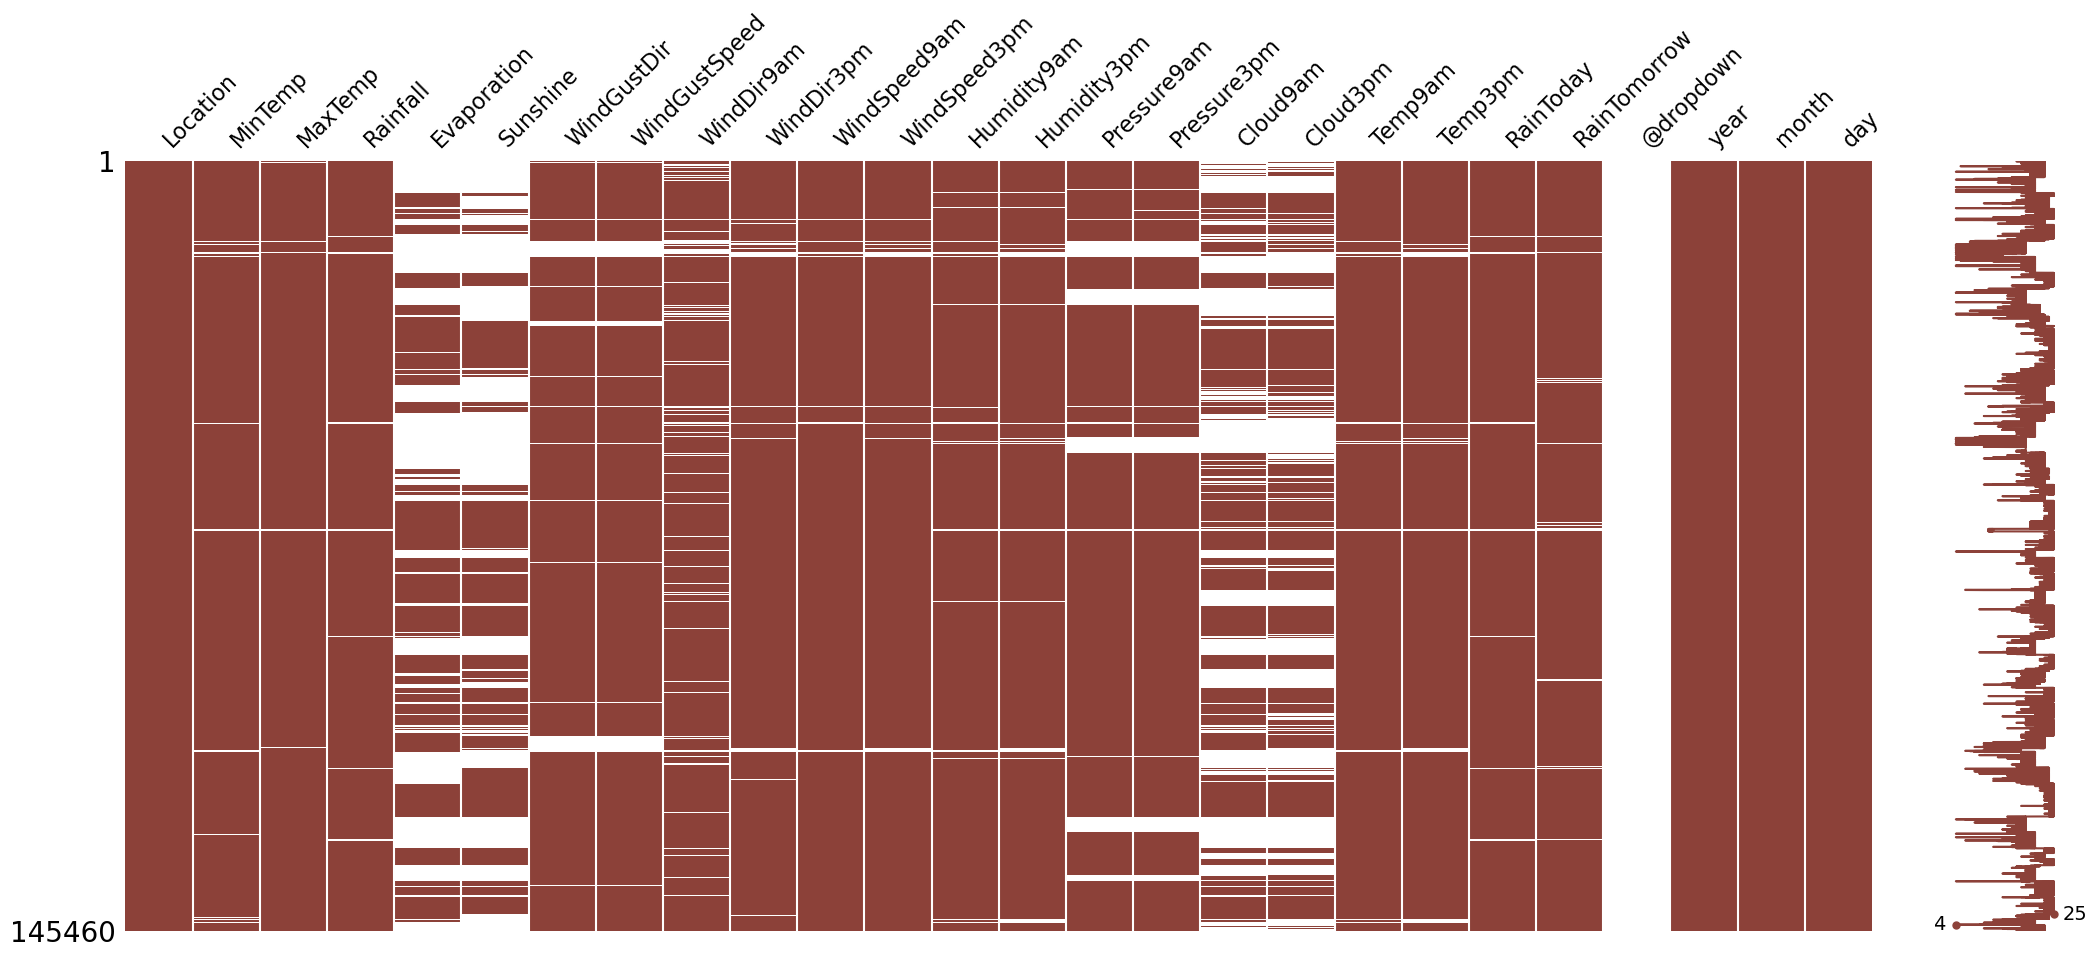

In [20]:
import missingno as msno
msno.matrix(data,color=(0.55, 0.255, 0.225), fontsize=16)

In [21]:
# Loading the names of categorical columns
data_cat = data[["RainToday", "WindGustDir", "WindDir9am", "WindDir3pm"]]

data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

In [22]:
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(), inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(), inplace=True)

In [23]:
# Loading the names of categorical columns
cat_names = data_cat.columns

# Initializing the SimpleImputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

# Converting array to DataFrame
data_cat = pd.DataFrame(data_cat, columns=cat_names)

# Concatenating the categorical and numeric data
data = pd.concat([data, data_cat], axis=1)